# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [10]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447667e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732048


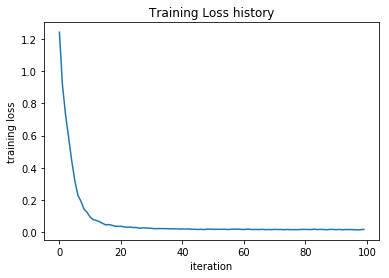

In [11]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [12]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [14]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302970
iteration 100 / 1000: loss 2.302474
iteration 200 / 1000: loss 2.297076
iteration 300 / 1000: loss 2.257328
iteration 400 / 1000: loss 2.230484
iteration 500 / 1000: loss 2.150620
iteration 600 / 1000: loss 2.080736
iteration 700 / 1000: loss 2.054914
iteration 800 / 1000: loss 1.979290
iteration 900 / 1000: loss 2.039101
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

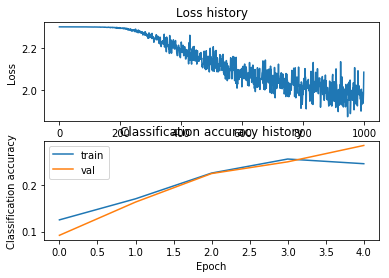

In [15]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

(3072, 50)


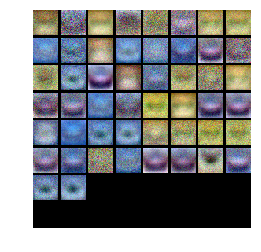

In [17]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    print(W1.shape)
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

iteration 0 / 2500: loss 2.310431
epoch train_acc: 0.235, val_acc: 0.159
iteration 100 / 2500: loss 1.868436
iteration 200 / 2500: loss 1.688479
epoch train_acc: 0.465, val_acc: 0.431
iteration 300 / 2500: loss 1.678590
iteration 400 / 2500: loss 1.611489
epoch train_acc: 0.55, val_acc: 0.448
iteration 500 / 2500: loss 1.533756
iteration 600 / 2500: loss 1.620841
iteration 700 / 2500: loss 1.551909
epoch train_acc: 0.605, val_acc: 0.467
iteration 800 / 2500: loss 1.463314
iteration 900 / 2500: loss 1.536242
epoch train_acc: 0.575, val_acc: 0.481
iteration 1000 / 2500: loss 1.398608
iteration 1100 / 2500: loss 1.424428
iteration 1200 / 2500: loss 1.344091
epoch train_acc: 0.54, val_acc: 0.502
iteration 1300 / 2500: loss 1.490428
iteration 1400 / 2500: loss 1.390646
epoch train_acc: 0.635, val_acc: 0.496
iteration 1500 / 2500: loss 1.340797
iteration 1600 / 2500: loss 1.367347
iteration 1700 / 2500: loss 1.453422
epoch train_acc: 0.575, val_acc: 0.506
iteration 1800 / 2500: loss 1.478107

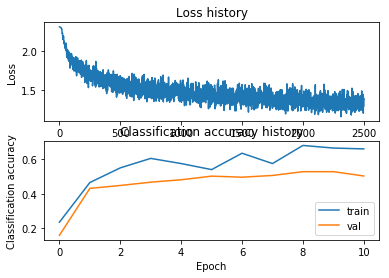

iteration 0 / 2500: loss 2.310339
epoch train_acc: 0.25390625, val_acc: 0.205
epoch train_acc: 0.34375, val_acc: 0.332
iteration 100 / 2500: loss 1.895802
epoch train_acc: 0.44140625, val_acc: 0.39
iteration 200 / 2500: loss 1.733231
epoch train_acc: 0.43359375, val_acc: 0.445
iteration 300 / 2500: loss 1.623710
epoch train_acc: 0.490234375, val_acc: 0.458
iteration 400 / 2500: loss 1.528724
epoch train_acc: 0.50390625, val_acc: 0.469
iteration 500 / 2500: loss 1.508815
epoch train_acc: 0.505859375, val_acc: 0.47
iteration 600 / 2500: loss 1.512823
epoch train_acc: 0.498046875, val_acc: 0.486
iteration 700 / 2500: loss 1.511158
epoch train_acc: 0.513671875, val_acc: 0.483
iteration 800 / 2500: loss 1.458027
epoch train_acc: 0.533203125, val_acc: 0.491
iteration 900 / 2500: loss 1.405085
epoch train_acc: 0.529296875, val_acc: 0.494
iteration 1000 / 2500: loss 1.436007
epoch train_acc: 0.57421875, val_acc: 0.503
iteration 1100 / 2500: loss 1.471226
epoch train_acc: 0.548828125, val_acc: 

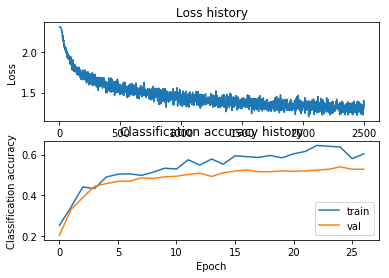

iteration 0 / 2500: loss 2.310313
epoch train_acc: 0.195, val_acc: 0.101
iteration 100 / 2500: loss 2.300359
iteration 200 / 2500: loss 2.239551
epoch train_acc: 0.145, val_acc: 0.21
iteration 300 / 2500: loss 2.135742
iteration 400 / 2500: loss 2.091383
epoch train_acc: 0.28, val_acc: 0.265
iteration 500 / 2500: loss 2.116368
iteration 600 / 2500: loss 2.016727
iteration 700 / 2500: loss 1.934194
epoch train_acc: 0.335, val_acc: 0.3
iteration 800 / 2500: loss 1.901970
iteration 900 / 2500: loss 1.923325
epoch train_acc: 0.295, val_acc: 0.328
iteration 1000 / 2500: loss 1.829575
iteration 1100 / 2500: loss 1.792220
iteration 1200 / 2500: loss 1.839041
epoch train_acc: 0.375, val_acc: 0.347
iteration 1300 / 2500: loss 1.801994
iteration 1400 / 2500: loss 1.769575
epoch train_acc: 0.34, val_acc: 0.36
iteration 1500 / 2500: loss 1.734423
iteration 1600 / 2500: loss 1.778207
iteration 1700 / 2500: loss 1.775015
epoch train_acc: 0.38, val_acc: 0.38
iteration 1800 / 2500: loss 1.731211
itera

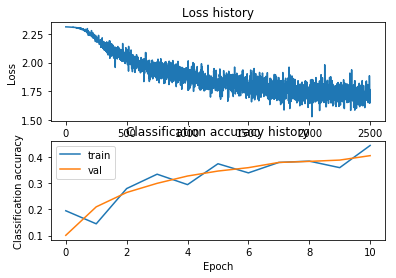

iteration 0 / 2500: loss 2.310209
epoch train_acc: 0.126953125, val_acc: 0.129
epoch train_acc: 0.228515625, val_acc: 0.25
iteration 100 / 2500: loss 2.301451
epoch train_acc: 0.181640625, val_acc: 0.201
iteration 200 / 2500: loss 2.264761
epoch train_acc: 0.21484375, val_acc: 0.22
iteration 300 / 2500: loss 2.200902
epoch train_acc: 0.22265625, val_acc: 0.243
iteration 400 / 2500: loss 2.120681
epoch train_acc: 0.255859375, val_acc: 0.255
iteration 500 / 2500: loss 2.044695
epoch train_acc: 0.255859375, val_acc: 0.266
iteration 600 / 2500: loss 2.058669
epoch train_acc: 0.236328125, val_acc: 0.286
iteration 700 / 2500: loss 2.062165
epoch train_acc: 0.2890625, val_acc: 0.289
iteration 800 / 2500: loss 1.940635
epoch train_acc: 0.28125, val_acc: 0.306
iteration 900 / 2500: loss 1.936965
epoch train_acc: 0.31640625, val_acc: 0.313
iteration 1000 / 2500: loss 1.906381
epoch train_acc: 0.318359375, val_acc: 0.318
iteration 1100 / 2500: loss 1.890327
epoch train_acc: 0.310546875, val_acc: 

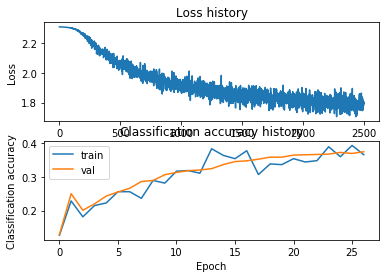

iteration 0 / 2500: loss 2.325843
epoch train_acc: 0.31, val_acc: 0.17
iteration 100 / 2500: loss 1.822522
iteration 200 / 2500: loss 1.844358
epoch train_acc: 0.425, val_acc: 0.425
iteration 300 / 2500: loss 1.552837
iteration 400 / 2500: loss 1.664125
epoch train_acc: 0.505, val_acc: 0.468
iteration 500 / 2500: loss 1.513631
iteration 600 / 2500: loss 1.401248
iteration 700 / 2500: loss 1.544768
epoch train_acc: 0.565, val_acc: 0.477
iteration 800 / 2500: loss 1.605737
iteration 900 / 2500: loss 1.439374
epoch train_acc: 0.62, val_acc: 0.484
iteration 1000 / 2500: loss 1.514340
iteration 1100 / 2500: loss 1.314536
iteration 1200 / 2500: loss 1.394509
epoch train_acc: 0.62, val_acc: 0.495
iteration 1300 / 2500: loss 1.402826
iteration 1400 / 2500: loss 1.404453
epoch train_acc: 0.665, val_acc: 0.502
iteration 1500 / 2500: loss 1.540422
iteration 1600 / 2500: loss 1.399797
iteration 1700 / 2500: loss 1.453164
epoch train_acc: 0.73, val_acc: 0.515
iteration 1800 / 2500: loss 1.580574
it

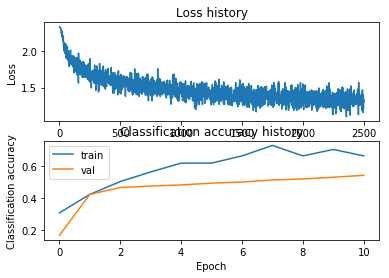

iteration 0 / 2500: loss 2.325665
epoch train_acc: 0.29296875, val_acc: 0.188
epoch train_acc: 0.333984375, val_acc: 0.346
iteration 100 / 2500: loss 1.860758
epoch train_acc: 0.421875, val_acc: 0.416
iteration 200 / 2500: loss 1.742718
epoch train_acc: 0.484375, val_acc: 0.439
iteration 300 / 2500: loss 1.673247
epoch train_acc: 0.4453125, val_acc: 0.46
iteration 400 / 2500: loss 1.580164
epoch train_acc: 0.447265625, val_acc: 0.465
iteration 500 / 2500: loss 1.541531
epoch train_acc: 0.515625, val_acc: 0.473
iteration 600 / 2500: loss 1.530901
epoch train_acc: 0.509765625, val_acc: 0.485
iteration 700 / 2500: loss 1.456621
epoch train_acc: 0.576171875, val_acc: 0.492
iteration 800 / 2500: loss 1.421371
epoch train_acc: 0.521484375, val_acc: 0.481
iteration 900 / 2500: loss 1.491148
epoch train_acc: 0.546875, val_acc: 0.494
iteration 1000 / 2500: loss 1.437604
epoch train_acc: 0.5703125, val_acc: 0.497
iteration 1100 / 2500: loss 1.486663
epoch train_acc: 0.55078125, val_acc: 0.507
it

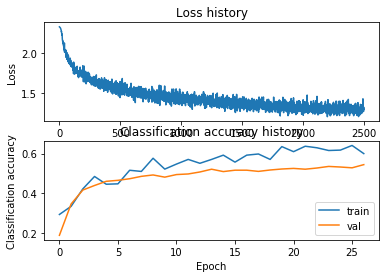

iteration 0 / 2500: loss 2.325646
epoch train_acc: 0.12, val_acc: 0.131
iteration 100 / 2500: loss 2.293602
iteration 200 / 2500: loss 2.223163
epoch train_acc: 0.245, val_acc: 0.239
iteration 300 / 2500: loss 2.124017
iteration 400 / 2500: loss 2.048435
epoch train_acc: 0.32, val_acc: 0.294
iteration 500 / 2500: loss 1.999248
iteration 600 / 2500: loss 1.876235
iteration 700 / 2500: loss 1.915942
epoch train_acc: 0.335, val_acc: 0.315
iteration 800 / 2500: loss 1.935561
iteration 900 / 2500: loss 1.821918
epoch train_acc: 0.295, val_acc: 0.335
iteration 1000 / 2500: loss 1.848516
iteration 1100 / 2500: loss 1.865426
iteration 1200 / 2500: loss 1.889731
epoch train_acc: 0.3, val_acc: 0.376
iteration 1300 / 2500: loss 2.009722
iteration 1400 / 2500: loss 1.675625
epoch train_acc: 0.395, val_acc: 0.38
iteration 1500 / 2500: loss 1.804022
iteration 1600 / 2500: loss 1.803880
iteration 1700 / 2500: loss 1.811306
epoch train_acc: 0.365, val_acc: 0.388
iteration 1800 / 2500: loss 1.767872
it

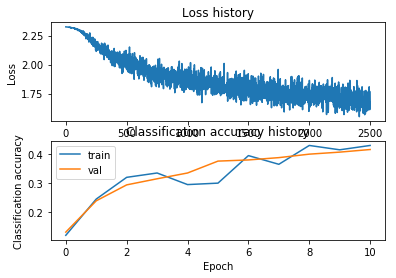

iteration 0 / 2500: loss 2.325676
epoch train_acc: 0.12109375, val_acc: 0.103
epoch train_acc: 0.2265625, val_acc: 0.251
iteration 100 / 2500: loss 2.299576
epoch train_acc: 0.2265625, val_acc: 0.227
iteration 200 / 2500: loss 2.198370
epoch train_acc: 0.224609375, val_acc: 0.248
iteration 300 / 2500: loss 2.167207
epoch train_acc: 0.234375, val_acc: 0.265
iteration 400 / 2500: loss 2.083130
epoch train_acc: 0.24609375, val_acc: 0.277
iteration 500 / 2500: loss 2.027347
epoch train_acc: 0.26953125, val_acc: 0.289
iteration 600 / 2500: loss 2.007185
epoch train_acc: 0.36328125, val_acc: 0.295
iteration 700 / 2500: loss 2.009119
epoch train_acc: 0.271484375, val_acc: 0.316
iteration 800 / 2500: loss 1.941974
epoch train_acc: 0.326171875, val_acc: 0.318
iteration 900 / 2500: loss 1.979978
epoch train_acc: 0.349609375, val_acc: 0.325
iteration 1000 / 2500: loss 1.855192
epoch train_acc: 0.328125, val_acc: 0.329
iteration 1100 / 2500: loss 1.843925
epoch train_acc: 0.359375, val_acc: 0.337


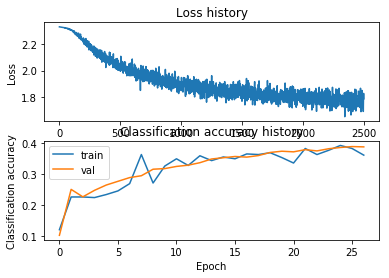

In [30]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
#hidden_size_pool = [50, 500]
hidden_size_pool = [1000, 3000]
learning_rate_pool = [1e-3, 1e-4]
reg_pool = [0.25]
batch_size_pool = [200,512]
lr_decay_pool = [0.95]
best_acc = 0

def run_nn(hidden_size, lr, batch_size, lr_decay, reg, num_iters=2500, plot=False):
    input_size = 32 * 32 * 3
    hidden_size = hidden_size
    num_classes = 10
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                      num_iters=num_iters, batch_size=batch_size,
                      learning_rate=lr, learning_rate_decay=lr_decay,
                      reg=reg, verbose=True)

    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    print('hidden_size: {}, lr: {}, batch_size: {}, lr_decay: {}, reg: {}, Validation accuracy: {}'.format(
        hidden_size, lr, batch_size, lr_decay, reg, val_acc))
    # Plot the loss function and train / validation accuracies
    if plot:
        plt.subplot(2, 1, 1)
        plt.plot(stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        #print(stats['train_acc_history'])
        plt.plot(stats['train_acc_history'], label='train')
        plt.plot(stats['val_acc_history'], label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Classification accuracy')
        plt.legend()
        plt.show()
    return val_acc, net

import itertools
combinations = itertools.product(hidden_size_pool, learning_rate_pool, batch_size_pool,lr_decay_pool, reg_pool)
for hidden_size, lr, batch_size, lr_decay, reg in combinations:
    val_acc, net = run_nn(hidden_size, lr, batch_size, lr_decay, reg, plot=True)
    if val_acc > best_acc:
        best_acc = val_acc
        best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


(3072, 3000)


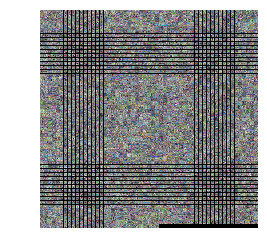

In [31]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [32]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.543


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$
1,3

$\color{blue}{\textit Your Explanation:}$

